In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import model
import simulate_single_modality as simulate

In [2]:
device = "cpu" # the device on which the model is trained, can be "cpu", "cuda" or "mps" ("mps" is only available for mac with M-series chip)
random_seed = 2025
r2 = 0.5 # true r2 of the simulated data
n = 1000 # simulation sample size
dim = 112 # dimensions of the simulated images
coord, true_beta, img_data, y = simulate.simulate_data(n, r2, dim, random_seed)

true_beta2.shape=(12544,)
p2=12544
Bases2.shape=(12544, 496)
theta2=[-0.00082491  0.00655612 -0.01284716 ...  0.00562157 -0.0118419
 -0.00865927] theta2.shape=(496000,)
theta2.shape=(496, 1000)
img2.shape=(1000, 12544)


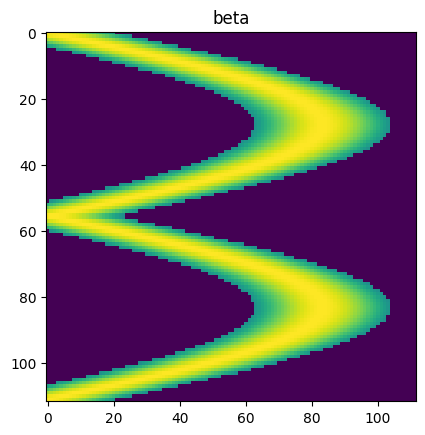

In [3]:
# plot true coefficients beta
plt.imshow(true_beta.reshape(dim, dim))
plt.title("beta")
plt.show();

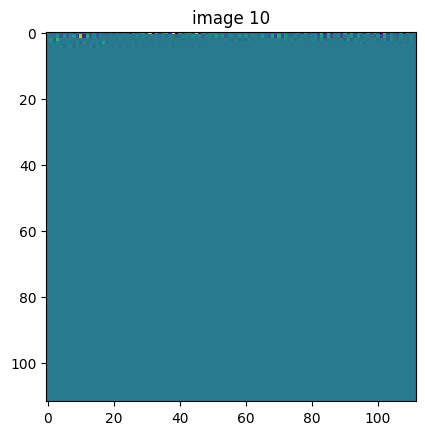

In [4]:
# plot the 10th image

plt.imshow(img_data[10].reshape(dim, dim))
plt.title("image 10")
plt.show();

In [5]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim

# create torch tensors
y = y.reshape(-1, 1)
y_tensor = torch.tensor(y, dtype = torch.float32).to(device)
img_tensor = torch.tensor(img_data, dtype = torch.float32).to(device)

# set random seed
torch.manual_seed(random_seed)
np.random.seed(random_seed)

# split training and testing set and pass them into torch dataloaders
X_train, X_test, y_train, y_test = train_test_split(img_tensor, y_tensor, test_size = 0.2, random_state = random_seed)

In [6]:
# train slgd